## Prepare

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/DL_project

/content/drive/MyDrive/DL_project


In [ ]:
! git clone https://github.com/Masao-Taketani/StarGAN-tf2

Cloning into 'StarGAN-tf2'...
remote: Enumerating objects: 205, done.
remote: Counting objects: 100% (205/205), done.
remote: Compressing objects: 100% (148/148), done.
remote: Total 205 (delta 117), reused 129 (delta 49), pack-reused 0
Receiving objects: 100% (205/205), 7.11 MiB | 13.32 MiB/s, done.
Resolving deltas: 100% (117/117), done.


In [ ]:
cd StarGAN-tf2

/content/drive/MyDrive/DL_project/StarGAN-tf2


In [ ]:
!pip install tensorflow-addons

     |████████████████████████████████| 686kB 7.4MB/s 


## Download Dataset and Create TFRecords

In [ ]:
# Download datatset
!bash download.sh celeba

Streaming output truncated to the last 5000 lines.
  inflating: ./data/celeba/images/195339.jpg  
  inflating: ./data/celeba/images/012465.jpg  
  inflating: ./data/celeba/images/089057.jpg  
  inflating: ./data/celeba/images/147796.jpg  
  inflating: ./data/celeba/images/192463.jpg  
  inflating: ./data/celeba/images/142818.jpg  
  inflating: ./data/celeba/images/148061.jpg  
  inflating: ./data/celeba/images/184432.jpg  
  inflating: ./data/celeba/images/201157.jpg  
  inflating: ./data/celeba/images/097288.jpg  
  inflating: ./data/celeba/images/130371.jpg  
  inflating: ./data/celeba/images/082864.jpg  
  inflating: ./data/celeba/images/017429.jpg  
  inflating: ./data/celeba/images/186077.jpg  
  inflating: ./data/celeba/images/126843.jpg  
  inflating: ./data/celeba/images/200381.jpg  
  inflating: ./data/celeba/images/012555.jpg  
  inflating: ./data/celeba/images/092238.jpg  
  inflating: ./data/celeba/images/008151.jpg  
  inflating: ./data/celeba/images/171418.jpg  
  inflati

In [ ]:
# get only 30000 images
with open("data/celeba/list_attr_celeba.txt", "r") as f:
    lines = f.readlines()
    
n = 30002
i = 0
with open("data/celeba/list_attr_celeba.txt", "w") as f:
    for line in lines:
        f.write(line)
        i += 1
        if i == n:
            break

In [ ]:
# create TFRecords
!python data_loader.py

2021-07-18 07:15:47.791694: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-07-18 07:15:50.539014: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-07-18 07:15:50.613811: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-07-18 07:15:50.614475: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-07-18 07:15:50.614519: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-07-18 07:15:50.708880: I tensorflow/stream_executor/platform/default

## Train

In [ ]:
# train model for 10 epochs 
!python train.py

2021-07-18 08:05:11.072173: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-07-18 08:05:13.010003: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-07-18 08:05:13.047420: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-07-18 08:05:13.048090: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-07-18 08:05:13.048146: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-07-18 08:05:13.051452: I tensorflow/stream_executor/platform/default

## Test

In [ ]:
# test model
from utils import get_models_for_testing, test_image

In [ ]:
# Load trained models
gen, _ = get_models_for_testing()

Check Generator's model architecture
Model: "generator"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
tf.reshape (TFOpLambda)         (None, 1, 1, 5)      0           input_2[0][0]                    
__________________________________________________________________________________________________
tf.cast (TFOpLambda)            (None, 1, 1, 5)      0           tf.reshape[0][0]                 
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
_____________________________________________________

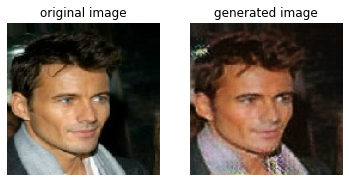

In [ ]:
img_path = "data/celeba/images/001106.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=False, 
           to_brown_hair=True, 
           to_male=False, 
           to_young=False)

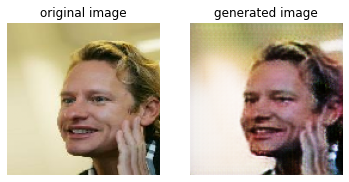

In [ ]:
img_path = "data/celeba/images/001342.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=True, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=False)

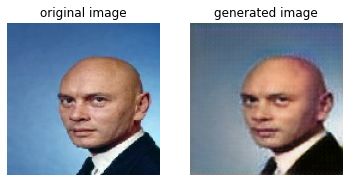

In [ ]:
img_path = "data/celeba/images/001519.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=True)

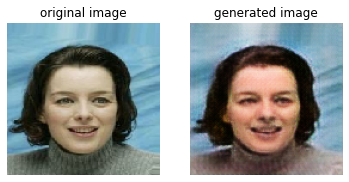

In [ ]:
img_path = "data/celeba/images/000176.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=True, 
           to_young=False)

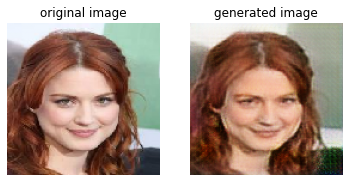

In [ ]:
img_path = "data/celeba/images/001013.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=True, 
           to_young=False)

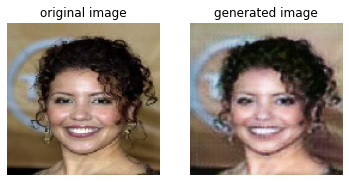

In [ ]:
img_path = "data/celeba/images/005512.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=False, 
           to_brown_hair=True, 
           to_male=False, 
           to_young=False)

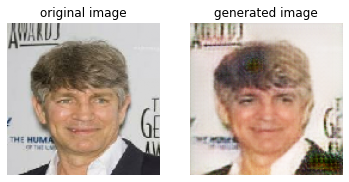

In [ ]:
img_path = "data/celeba/images/067518.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=True, 
           to_brown_hair=False, 
           to_male=False, 
           to_young=False)

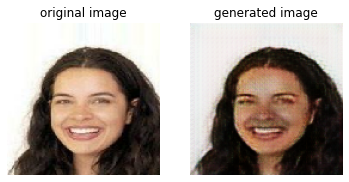

In [ ]:
img_path = "data/celeba/images/101731.jpg"

#(e.g.) To make the image into blond hair
test_image(model=gen,
           fpath=img_path, 
           to_black_hair=False, 
           to_blond_hair=False, 
           to_brown_hair=False, 
           to_male=True, 
           to_young=False)